## CASA0002_Urban simulation

# Underground Commuters Practical

Antonia Godoy-Lorite, Elsa Arcaute

March 2021

This practical will show you how to create Commuting flows network, in this case for commuter in the London tube, and analyse these flows in terms of centrality and disruptions.

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import os

First, we are going to read the underground network presented in previous practicals. This is going to be the underlying network used by commuters:

In [3]:
#we are going to read the tube network from the shape file
#first, check current directory
os.getcwd()

'D:\\ucl\\urbanSimulation\\us\\TubeCommuters_Practical'

In [5]:
# You need to set the working directory to where you have your shapefile data
os.chdir('D:\\ucl\\urbanSimulation\\us\\TubeCommuters_Practical\\underground\\')

# Let's create a graph from the shapefile
g_shp=nx.read_shp('underground.shp',geom_attrs=False)

# We can print the dataframe from the shapefile to check the data
df = nx.to_pandas_edgelist(g_shp)
df[0:10]

,source,target,station_2_,distance,station_1,ShpName,station_2,toid_seq,station_1_
0,"(-0.1571, 51.5226)","(-0.1631, 51.5225)",Marylebone,416.586050,11,underground,163,1,Baker Street
1,"(-0.1571, 51.5226)","(-0.1466, 51.5234)",Regent's Park,734.173636,11,underground,212,2,Baker Street
2,"(-0.1571, 51.5226)","(-0.17, 51.5203)",Edgware Road (C),931.211577,11,underground,83,171,Baker Street
3,"(-0.1571, 51.5226)","(-0.1439, 51.5238)",Great Portland Street,925.826411,11,underground,104,225,Baker Street
4,"(-0.1571, 51.5226)","(-0.1494, 51.5142)",Bond Street,1076.607648,11,underground,28,197,Baker Street
5,"(-0.1571, 51.5226)","(-0.174, 51.5347)",St. John's Wood,1785.442777,11,underground,249,198,Baker Street
6,"(-0.1571, 51.5226)","(-0.1803, 51.5472)",Finchley Road,3175.274183,11,underground,94,226,Baker Street
7,"(-0.1247, 51.508)","(-0.1223, 51.5074)",Embankment,179.503418,49,underground,87,277,Charing Cross
8,"(-0.1247, 51.508)","(-0.1342, 51.5098)",Picadilly Circus,689.289845,49,underground,197,4,Charing Cross
9,"(-0.1247, 51.508)","(-0.1281, 51.5113)",Leicester Square,436.484594,49,underground,151,278,Charing Cross


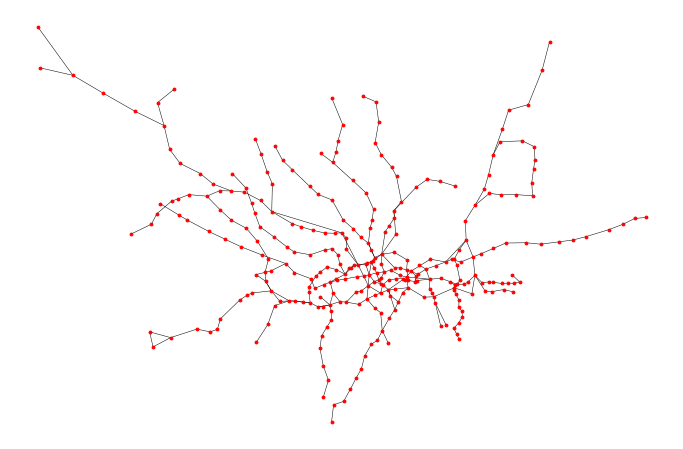

In [6]:
# Let's plot the tube network:

# first we need to extract the coordinates from every node:
pos = {xy: xy for xy in g_shp.nodes()}

fig, ax = plt.subplots(figsize=(12,8))

nx.draw_networkx_nodes(g_shp,pos,node_size=8,node_color='r')
nx.draw_networkx_edges(g_shp,pos,arrows=False,width=0.5)
plt.axis("off")
plt.show()

In [7]:
#Now, let's check attributes of edges and nodes:
#edges:
list(g_shp.edges(data = True))[0]

((-0.1571, 51.5226),
 (-0.1631, 51.5225),
 {'toid_seq': '1',
  'station_1': 11,
  'station_1_': 'Baker Street',
  'station_2': 163,
  'station_2_': 'Marylebone',
  'distance': 416.586050414,
  'ShpName': 'underground'})

In [8]:
#nodes:
list(g_shp.nodes(data=True))[0:10]

[((-0.1571, 51.5226), {}),
 ((-0.1631, 51.5225), {}),
 ((-0.1466, 51.5234), {}),
 ((-0.1247, 51.508), {}),
 ((-0.1223, 51.5074), {}),
 ((-0.1342, 51.5098), {}),
 ((-0.1679, 51.5199), {}),
 ((-0.1755, 51.5154), {}),
 ((-0.1001, 51.4943), {}),
 ((-0.1115, 51.4991), {})]

In [9]:
#we will need to add station names as attributes of the nodes:
nod_st1={(e1):weight for e1, e2, weight in g_shp.edges(data='station_1_')}
nod_st2={(e2):weight for e1, e2, weight in g_shp.edges(data='station_2_')}
#nod_all = {**nod_st1, **nod_st2} #for python 3.5 and greater

#In Python 2, (or 3.4 or lower) write a function
nod_all = nod_st1.copy()   # start with x's keys and values
nod_all.update(nod_st2)

nx.set_node_attributes(g_shp,nod_all,'station')

# get the nodes attributes:
list(g_shp.nodes(data=True))[0:10]

[((-0.1571, 51.5226), {'station': 'Baker Street'}),
 ((-0.1631, 51.5225), {'station': 'Marylebone'}),
 ((-0.1466, 51.5234), {'station': "Regent's Park"}),
 ((-0.1247, 51.508), {'station': 'Charing Cross'}),
 ((-0.1223, 51.5074), {'station': 'Embankment'}),
 ((-0.1342, 51.5098), {'station': 'Picadilly Circus'}),
 ((-0.1679, 51.5199), {'station': 'Edgware Road (B)'}),
 ((-0.1755, 51.5154), {'station': 'Paddington'}),
 ((-0.1001, 51.4943), {'station': 'Elephant & Castle'}),
 ((-0.1115, 51.4991), {'station': 'Lambeth North'})]

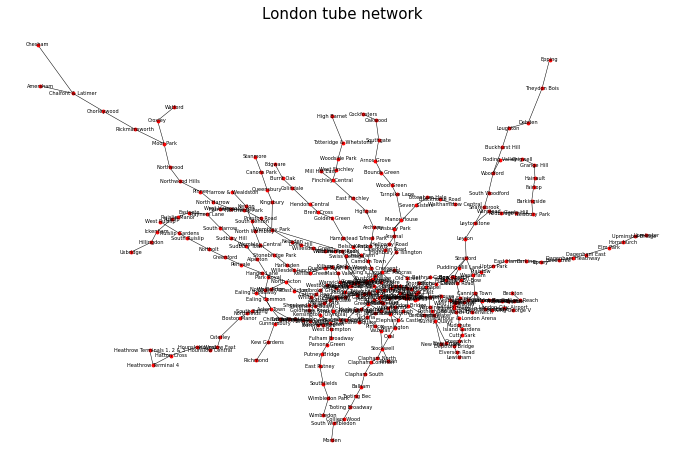

In [15]:
#We can plot the underground network with stations names:
fig, ax = plt.subplots(figsize=(12,8))

node_labels = nx.get_node_attributes(g_shp, 'station')

pos = {xy: xy for xy in g_shp.nodes()}

nx.draw_networkx_nodes(g_shp,pos,node_size=8,node_color='r')
nx.draw_networkx_edges(g_shp,pos,arrows=False,width=0.5)
nx.draw_networkx_labels(g_shp,pos, node_labels, font_size=5,font_color='black')

plt.title("London tube network",fontsize=15)
plt.axis("off")
plt.show()

In [16]:
#do we want this graph to be a directed one? In fact, only a few links in the dataset are directed

# We can transform the type of graph from directed to undirected using the following function:
g_shp_un = g_shp.to_undirected()

#Finally, we will give an ID to each node(station), such that it will be easier later to call them:
#1.Create a new attribute with node coordinates (now coord are the keys and we do not want to lose that information
nod_coord = {(e1):e1 for e1 in g_shp_un.nodes()}
nx.set_node_attributes(g_shp_un,nod_coord,'station_coord')
list(g_shp_un.nodes(data=True))[0:10]


[((-0.1571, 51.5226),
  {'station': 'Baker Street', 'station_coord': (-0.1571, 51.5226)}),
 ((-0.1631, 51.5225),
  {'station': 'Marylebone', 'station_coord': (-0.1631, 51.5225)}),
 ((-0.1466, 51.5234),
  {'station': "Regent's Park", 'station_coord': (-0.1466, 51.5234)}),
 ((-0.1247, 51.508),
  {'station': 'Charing Cross', 'station_coord': (-0.1247, 51.508)}),
 ((-0.1223, 51.5074),
  {'station': 'Embankment', 'station_coord': (-0.1223, 51.5074)}),
 ((-0.1342, 51.5098),
  {'station': 'Picadilly Circus', 'station_coord': (-0.1342, 51.5098)}),
 ((-0.1679, 51.5199),
  {'station': 'Edgware Road (B)', 'station_coord': (-0.1679, 51.5199)}),
 ((-0.1755, 51.5154),
  {'station': 'Paddington', 'station_coord': (-0.1755, 51.5154)}),
 ((-0.1001, 51.4943),
  {'station': 'Elephant & Castle', 'station_coord': (-0.1001, 51.4943)}),
 ((-0.1115, 51.4991),
  {'station': 'Lambeth North', 'station_coord': (-0.1115, 51.4991)})]

In [17]:
#2.now relabel each node with an ordered integer:
node_list = list(g_shp_un.nodes())
mapping = {node_list[i]:i for i in range(len(node_list))}
g_shp_un = nx.relabel_nodes(g_shp_un, mapping)
list(g_shp_un.nodes(data=True))[0:10]

[(0, {'station': 'Baker Street', 'station_coord': (-0.1571, 51.5226)}),
 (1, {'station': 'Marylebone', 'station_coord': (-0.1631, 51.5225)}),
 (2, {'station': "Regent's Park", 'station_coord': (-0.1466, 51.5234)}),
 (3, {'station': 'Charing Cross', 'station_coord': (-0.1247, 51.508)}),
 (4, {'station': 'Embankment', 'station_coord': (-0.1223, 51.5074)}),
 (5, {'station': 'Picadilly Circus', 'station_coord': (-0.1342, 51.5098)}),
 (6, {'station': 'Edgware Road (B)', 'station_coord': (-0.1679, 51.5199)}),
 (7, {'station': 'Paddington', 'station_coord': (-0.1755, 51.5154)}),
 (8, {'station': 'Elephant & Castle', 'station_coord': (-0.1001, 51.4943)}),
 (9, {'station': 'Lambeth North', 'station_coord': (-0.1115, 51.4991)})]

In [18]:
#Later when using the Commuters data we will have an issue mapping node 'Heathrow Terminals 1, 2 & 3', 
#so we are going to rename it here:
#1. find the node 'Heathrow Terminals 1, 2 & 3'
nodes = [(x,y) for x,y in g_shp_un.nodes(data='station') if 'Heathrow' in str(y)]
nodes

[(258, 'Heathrow Terminals 1, 2 & 3'), (259, 'Heathrow Terminal 4')]

In [19]:
#2.Rename it with the name given by the the commuters file (see later):
g_shp_un.nodes[258]['station']='Heathrow Terminals 123'

## Commuters flows in the tube network

We are going to create the flows of commuters travelling between any pair of tube stations

In [20]:
import pandas as pd
#First, we read the csv file with commuting flows starting and ending between stations, called Origin-Destination:
#Check you are in the correct directory to read the csv 
os.chdir('D:\\ucl\\urbanSimulation\\us\\TubeCommuters_Practical\\')

In [21]:
# Read Origin-Destination table from the csv
orig_dest = pd.read_csv('ODtube2017.csv')
orig_dest.head(20)

,From,station_name,To,station_name.1,total_wtrips
0,500,Acton Town,505,Alperton,143
1,500,Acton Town,506,Amersham,22
2,500,Acton Town,507,Angel,15
3,500,Acton Town,508,Archway,9
4,500,Acton Town,510,Arsenal,9
5,500,Acton Town,511,Baker Street,19
6,500,Acton Town,513,Bank,226
7,500,Acton Town,501,Barbican,7
8,500,Acton Town,516,Barons Court,36
9,500,Acton Town,517,Bayswater,2


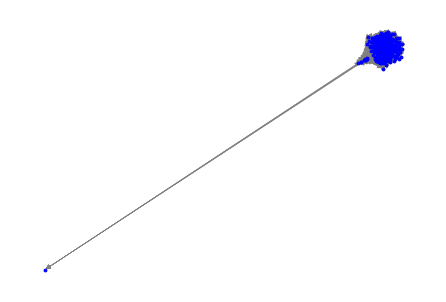

In [22]:
#This can be seen as a network by itself:
g_OD = nx.from_pandas_edgelist(orig_dest, 'station_name', 'station_name.1',['total_wtrips'],create_using=nx.MultiDiGraph)

# Plot graph
nx.draw(g_OD,
        node_color='b',
        node_size=8,
        edge_color='gray',
        width=0.4)

In [23]:
#Directed weighted network, weights are the total number of commuters from one station to another
list(g_OD.edges(data=True))[0:10]

[('Acton Town', 'Alperton', {'total_wtrips': 143}),
 ('Acton Town', 'Amersham', {'total_wtrips': 22}),
 ('Acton Town', 'Angel', {'total_wtrips': 15}),
 ('Acton Town', 'Archway', {'total_wtrips': 9}),
 ('Acton Town', 'Arsenal', {'total_wtrips': 9}),
 ('Acton Town', 'Baker Street', {'total_wtrips': 19}),
 ('Acton Town', 'Bank', {'total_wtrips': 226}),
 ('Acton Town', 'Barbican', {'total_wtrips': 7}),
 ('Acton Town', 'Barons Court', {'total_wtrips': 36}),
 ('Acton Town', 'Bayswater', {'total_wtrips': 2})]

In [24]:
#Change the names of nodes by the id in g_shp_un (tube network):

#1.Copy name as an attribute:
nod_names={(e1):e1 for e1 in g_OD.nodes()}
nx.set_node_attributes(g_OD,nod_names,'station') #with nod_id1 or nod_id2 is enought
print(list(g_OD.nodes(data=True))[:10])

[('Acton Town', {'station': 'Acton Town'}), ('Alperton', {'station': 'Alperton'}), ('Amersham', {'station': 'Amersham'}), ('Angel', {'station': 'Angel'}), ('Archway', {'station': 'Archway'}), ('Arsenal', {'station': 'Arsenal'}), ('Baker Street', {'station': 'Baker Street'}), ('Bank', {'station': 'Bank'}), ('Barbican', {'station': 'Barbican'}), ('Barons Court', {'station': 'Barons Court'})]


In [25]:
#2.Do the mapping with id in g_shp_un
mapping = {g_shp_un.nodes[i]['station']:i for i in g_shp_un.nodes()}
g_OD = nx.relabel_nodes(g_OD, mapping)
print(list(g_OD.nodes(data=True))[:10])

[(111, {'station': 'Acton Town'}), (238, {'station': 'Alperton'}), (172, {'station': 'Amersham'}), (196, {'station': 'Angel'}), (198, {'station': 'Archway'}), (244, {'station': 'Arsenal'}), (0, {'station': 'Baker Street'}), (25, {'station': 'Bank'}), (77, {'station': 'Barbican'}), (100, {'station': 'Barons Court'})]


In [26]:
#and we can add coodenates to the nodes, from the shapefile of the tube network:
nod_coords={(e1):coord for e1, coord in g_shp_un.nodes(data='station_coord')}

nx.set_node_attributes(g_OD,nod_coords,'station_coord') #with nod_id1 or nod_id2 is enought

pos = {e1: xy for e1,xy in g_OD.nodes(data='station_coord')}


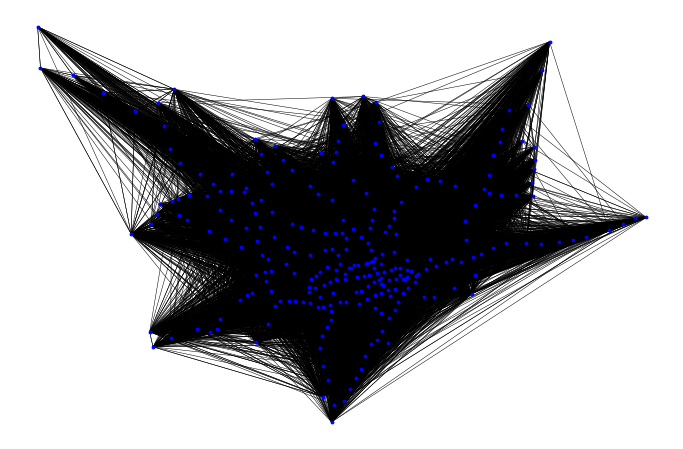

In [27]:
#To finaly plot the OD matrix as a network:
fig, ax = plt.subplots(figsize=(12,8))

nx.draw_networkx_nodes(g_OD,g_OD.nodes(data='station_coord'),node_size=8,node_color='b')
nx.draw_networkx_edges(g_OD,pos,arrows=False,width=0.5)
plt.axis("off")
plt.show()



In [28]:
#Now, let's create the network with the actual flow of commuters travelling between each pair of stations,
#regardless which was their origin and destination:

#We will create that graph using the adjacency matrix method that was presented in previous practicals:
#First we create an empty adjacency matrix:
N=len(g_shp_un.nodes()) #As we are going to use shortest path in the tube network, N is from g_shp_un
adj_c=np.zeros((N, N))

#Fill the adjacency matrix with Origin-Destination flows:
#From origin to destination with x commuters, we will compute the shortest path and fill the number of commuters
#for each pair of stations they go through:
for e1,e2,C in g_OD.edges(data='total_wtrips'):
    path = nx.dijkstra_path(g_shp_un,e1,e2)  #shortest path e1,e2 taking into account distance weights in g_shp_un
    path_edges = list(zip(path,path[1:])) #list of tuples with shortest path edges [(e1,s2),(s3,s4),...,(s(n-1),e2)]
    for (s1,s2) in path_edges:
            adj_c[s1,s2]=adj_c[s1,s2]+C #sum the contribution of the OD flow to all edges in the shortest path
adj_c

array([[    0., 15400., 36470., ...,     0.,     0.,     0.],
       [15035.,     0.,     0., ...,     0.,     0.,     0.],
       [19675.,     0.,     0., ...,     0.,     0.,     0.],
       ...,
       [    0.,     0.,     0., ...,     0.,     0.,     0.],
       [    0.,     0.,     0., ...,     0.,     0.,     0.],
       [    0.,     0.,     0., ...,     0.,     0.,     0.]])

In [29]:
# Calculate the distance matrix
dis_mat = dict(nx.all_pairs_dijkstra_path_length(g_shp_un, weight = "distance"))

In [30]:
#shandiao
# step 0: 建 序号-站点名 的表
part2_list=[]
part2_list=pd.DataFrame(part2_list)
part2_list['number']=None
part2_list['station_name']=None
part2_list
i_list=[]
name_list=[]
for i in g_shp_un.nodes:
    i_list.append(i)
    name_list.append(g_shp_un.nodes[i]['station'])
part2_list['number']=i_list
part2_list['station_name']=name_list
part2_list

,number,station_name
0,0,Baker Street
1,1,Marylebone
2,2,Regent's Park
3,3,Charing Cross
4,4,Embankment
...,...,...
301,301,Elverson Road
302,302,Lewisham
303,303,Limehouse
304,304,Westferry


In [216]:
# step 1: 遍历flow表， 找到每行的起点终点对应数字a,b，加入表中（加两列）
import copy
flowlist=copy.deepcopy(orig_dest)
flowlist['orig']=None
flowlist['dest']=None
origlist=[]
destlist=[]
flowlist
for i in range(34058):
    NAMEo=flowlist['station_name'][i]
    NUMBERo=int(part2_list[part2_list['station_name']==NAMEo]['number'])
    NAMEd=flowlist['station_name.1'][i]
    NUMBERd=int(part2_list[part2_list['station_name']==NAMEd]['number'])
    #print(NUMBER)
    origlist.append(NUMBERo)
    destlist.append(NUMBERd)
flowlist['orig']=origlist
flowlist['dest']=destlist
flowlist

,From,station_name,To,station_name.1,total_wtrips,orig,dest
0,500,Acton Town,505,Alperton,143,111,238
1,500,Acton Town,506,Amersham,22,111,172
2,500,Acton Town,507,Angel,15,111,196
3,500,Acton Town,508,Archway,9,111,198
4,500,Acton Town,510,Arsenal,9,111,244
...,...,...,...,...,...,...,...
34053,771,Woodside Park,747,Waterloo,93,236,10
34054,771,Woodside Park,755,West Brompton,0,236,118
34055,771,Woodside Park,756,West Finchley,34,236,230
34056,771,Woodside Park,761,Westminster,51,236,86


In [217]:
# step 2: 遍历flow表 在每行末尾加上dis_mat[a][b] （加一列）

dist_list=[]
for i in range(34058):
    a=flowlist['orig'][i]
    b=flowlist['dest'][i]
    dist_list.append(dis_mat[a][b])
flowlist['dis']=dist_list

In [218]:
flowlist

,From,station_name,To,station_name.1,total_wtrips,orig,dest,dis
0,500,Acton Town,505,Alperton,143,111,238,4785.556297
1,500,Acton Town,506,Amersham,22,111,172,36052.719259
2,500,Acton Town,507,Angel,15,111,196,14868.355669
3,500,Acton Town,508,Archway,9,111,198,17188.348797
4,500,Acton Town,510,Arsenal,9,111,244,17036.911892
...,...,...,...,...,...,...,...,...
34053,771,Woodside Park,747,Waterloo,93,236,10,15501.293345
34054,771,Woodside Park,755,West Brompton,0,236,118,19396.508328
34055,771,Woodside Park,756,West Finchley,34,236,230,953.113159
34056,771,Woodside Park,761,Westminster,51,236,86,15547.114781


In [219]:
flowlist_temp = flowlist
out_flow_temp = flowlist_temp.groupby(['orig']).sum(['total_wtrips'])
out_flow_temp.drop([ 'From', 'To', 'dest', 'dis'],  inplace=True, axis = 1)
print(out_flow_temp)

flowlist_temp2 = flowlist
in_flow_temp = flowlist_temp2.groupby(['dest']).sum(['total_wtrips'])
in_flow_temp.drop([ 'From', 'To', 'orig', 'dis'],  inplace=True, axis = 1)
print(in_flow_temp)

      total_wtrips
orig              
0            24812
1            12576
2             3128
3            15330
4            15961
...            ...
272          33326
273          39129
274          27564
275          10695
276          32662

[264 rows x 1 columns]
      total_wtrips
dest              
0            26836
1            12652
2             3965
3            17958
4            21813
...            ...
272          24288
273          34594
274          28290
275          10049
276          28851

[265 rows x 1 columns]


In [220]:
flowlist['orig_out'] = None
flowlist['dest_in'] = None

origout=[]
destin=[]

flowlist
for i in range(34058):
    ONumbers=flowlist.loc[i]['orig']
    Oout=out_flow_temp.loc[ONumbers]['total_wtrips']
    origout.append(Oout)
    DNumbers=flowlist.loc[i]['dest']
    Din=in_flow_temp.loc[DNumbers]['total_wtrips']
    destin.append(Din)
flowlist['dest_in'] = destin
flowlist['orig_out'] = origout

,From,station_name,To,station_name.1,total_wtrips,orig,dest,dis,orig_out,dest_in
0,500,Acton Town,505,Alperton,143,111,238,4785.556297,5910,2961
1,500,Acton Town,506,Amersham,22,111,172,36052.719259,5910,1384
2,500,Acton Town,507,Angel,15,111,196,14868.355669,5910,17781
3,500,Acton Town,508,Archway,9,111,198,17188.348797,5910,7388
4,500,Acton Town,510,Arsenal,9,111,244,17036.911892,5910,1857
...,...,...,...,...,...,...,...,...,...,...
34053,771,Woodside Park,747,Waterloo,93,236,10,15501.293345,4025,87309
34054,771,Woodside Park,755,West Brompton,0,236,118,19396.508328,4025,4854
34055,771,Woodside Park,756,West Finchley,34,236,230,953.113159,4025,1374
34056,771,Woodside Park,761,Westminster,51,236,86,15547.114781,4025,24164


In [232]:
flowlist
flowlist.to_csv("flowlist.csv")

In [229]:
import numpy as np
#now we can create a pivot table to trun paired list into a matrix, and compute the margin as well
cdatasubmat = pd.pivot_table(flowlist, values ="total_wtrips", index="station_name", columns = "station_name.1",
                            aggfunc=np.sum, margins=True)
cdatasubmat


station_name.1,Acton Town,Aldgate,Aldgate East,Alperton,Amersham,Angel,Archway,Arnos Grove,Arsenal,Baker Street,...,White City,Whitechapel,Willesden Green,Willesden Junction,Wimbledon,Wimbledon Park,Wood Green,Woodford,Woodside Park,All
station_name,,,,,,,,,,,,,,,,,,,,,
Acton Town,NaN,NaN,NaN,143.0,22.0,15.0,9.0,NaN,9.0,19.0,...,NaN,10.0,0.0,NaN,71.0,97.0,27.0,NaN,NaN,5910
Aldgate,0.0,NaN,NaN,NaN,0.0,46.0,12.0,22.0,0.0,271.0,...,NaN,NaN,18.0,NaN,7.0,NaN,43.0,4.0,0.0,9974
Aldgate East,22.0,NaN,NaN,NaN,NaN,121.0,0.0,0.0,NaN,21.0,...,8.0,592.0,NaN,NaN,2.0,NaN,NaN,4.0,NaN,11598
Alperton,192.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,6.0,6.0,...,NaN,NaN,NaN,NaN,49.0,NaN,0.0,NaN,NaN,3084
Amersham,NaN,52.0,NaN,83.0,NaN,4.0,NaN,NaN,NaN,73.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wimbledon Park,NaN,NaN,24.0,0.0,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,533.0,NaN,NaN,NaN,NaN,2504
Wood Green,NaN,8.0,60.0,27.0,NaN,99.0,NaN,231.0,0.0,35.0,...,45.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,12714
Woodford,NaN,19.0,68.0,NaN,NaN,19.0,0.0,NaN,NaN,36.0,...,44.0,206.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,7024


In [240]:
flowlist.rename(columns={"station_name":"Orig", "station_name.1": "Dest"}, inplace = True)

In [233]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import folium
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats
import numpy as np
from math import sqrt

In [234]:
def CalcRSqaured(observed, estimated):
    """Calculate the r^2 from a series of observed and estimated target values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    r, p = scipy.stats.pearsonr(observed, estimated)
    R2 = r **2
    
    return R2

def CalcRMSE(observed, estimated):
    """Calculate Root Mean Square Error between a series of observed and estimated values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    res = (observed -estimated)**2
    RMSE = round(sqrt(res.mean()), 3)
    
    return RMSE

In [241]:
#create the formula (the "-1" indicates no intercept in the regression model).
dbl_form = 'total_wtrips ~ Dest + Orig+ dis'
#run a production constrained sim
doubSim = smf.glm(formula = dbl_form, data=flowlist, family=sm.families.Poisson()).fit()
#let's have a look at it's summary
print(doubSim.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           total_wtrips   No. Observations:                34058
Model:                            GLM   Df Residuals:                    33529
Model Family:                 Poisson   Df Model:                          528
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.5978e+06
Date:                Wed, 21 Apr 2021   Deviance:                   3.0415e+06
Time:                        14:42:43   Pearson chi2:                 4.02e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [ ]:
#set up some variables to hold our parameter values in:
alpha = 1
gamma = 1
beta = -2
k = 1
T2 = sum(cdatasub["Total"])

vi1_alpha = cdatasub["vi1_origpop"]**alpha
wj2_gamma = cdatasub["wj2_destsal"]**gamma
dist_beta = cdatasub["Dist"]**beta
T1 = vi1_alpha*wj2_gamma*dist_beta
k = T2/sum(T1)

#run the model and store of the new flow estimates in a new column
cdatasub["unconstrainedEst1"] = round(k*vi1_alpha*wj2_gamma*dist_beta, 0)
#convert to integers
cdatasub["unconstrainedEst1"] = cdatasub["unconstrainedEst1"].astype(int)
#check that the sum of these estimates make sense
sum(cdatasub["unconstrainedEst1"])

In [230]:
r=pd.read_csv('OD_with_distances.csv')


to_station,Acton Town,Aldgate,Aldgate East,Alperton,Amersham,Angel,Archway,Arnos Grove,Arsenal,Baker Street,...,White City,Whitechapel,Willesden Green,Willesden Junction,Wimbledon,Wimbledon Park,Wood Green,Woodford,Woodside Park,All
from_station,,,,,,,,,,,,,,,,,,,,,
Acton Town,NaN,0.0,0.0,143.0,22.0,15.0,9.0,0.0,9.0,19.0,...,0.0,10.0,0.0,0.0,71.0,97.0,27.0,0.0,0.0,5910
Aldgate,0.0,NaN,0.0,0.0,0.0,46.0,12.0,22.0,0.0,271.0,...,0.0,0.0,18.0,0.0,7.0,0.0,43.0,4.0,0.0,9974
Aldgate East,22.0,0.0,NaN,0.0,0.0,121.0,0.0,0.0,0.0,21.0,...,8.0,592.0,0.0,0.0,2.0,0.0,0.0,4.0,0.0,11598
Alperton,192.0,0.0,0.0,NaN,4.0,0.0,0.0,0.0,6.0,6.0,...,0.0,0.0,0.0,0.0,49.0,0.0,0.0,0.0,0.0,3084
Amersham,0.0,52.0,0.0,83.0,NaN,4.0,0.0,0.0,0.0,73.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wimbledon Park,0.0,0.0,24.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,533.0,NaN,0.0,0.0,0.0,2504
Wood Green,0.0,8.0,60.0,27.0,0.0,99.0,0.0,231.0,0.0,35.0,...,45.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,12714
Woodford,0.0,19.0,68.0,0.0,0.0,19.0,0.0,0.0,0.0,36.0,...,44.0,206.0,0.0,0.0,4.0,0.0,0.0,NaN,0.0,7024


In [87]:
#Create the new graph from the adjancency matrix:
g_flows=nx.from_numpy_matrix(adj_c, create_using=nx.DiGraph)


In [88]:
#we need to give coordinates to these nodes too:
nod_coord = {(e1):coord for e1,coord in g_shp_un.nodes(data='station_coord')}
nx.set_node_attributes(g_flows,nod_coord,'station_coord')
list(g_flows.nodes(data=True))[0:10]

[(0, {'station_coord': (-0.1571, 51.5226)}),
 (1, {'station_coord': (-0.1631, 51.5225)}),
 (2, {'station_coord': (-0.1466, 51.5234)}),
 (3, {'station_coord': (-0.1247, 51.508)}),
 (4, {'station_coord': (-0.1223, 51.5074)}),
 (5, {'station_coord': (-0.1342, 51.5098)}),
 (6, {'station_coord': (-0.1679, 51.5199)}),
 (7, {'station_coord': (-0.1755, 51.5154)}),
 (8, {'station_coord': (-0.1001, 51.4943)}),
 (9, {'station_coord': (-0.1115, 51.4991)})]

In [89]:
#also the station names:
nod_names = {(e1):name for e1,name in g_shp_un.nodes(data='station')}
nx.set_node_attributes(g_flows,nod_names,'station')
list(g_flows.nodes(data=True))[0:10]

[(0, {'station_coord': (-0.1571, 51.5226), 'station': 'Baker Street'}),
 (1, {'station_coord': (-0.1631, 51.5225), 'station': 'Marylebone'}),
 (2, {'station_coord': (-0.1466, 51.5234), 'station': "Regent's Park"}),
 (3, {'station_coord': (-0.1247, 51.508), 'station': 'Charing Cross'}),
 (4, {'station_coord': (-0.1223, 51.5074), 'station': 'Embankment'}),
 (5, {'station_coord': (-0.1342, 51.5098), 'station': 'Picadilly Circus'}),
 (6, {'station_coord': (-0.1679, 51.5199), 'station': 'Edgware Road (B)'}),
 (7, {'station_coord': (-0.1755, 51.5154), 'station': 'Paddington'}),
 (8, {'station_coord': (-0.1001, 51.4943), 'station': 'Elephant & Castle'}),
 (9, {'station_coord': (-0.1115, 51.4991), 'station': 'Lambeth North'})]

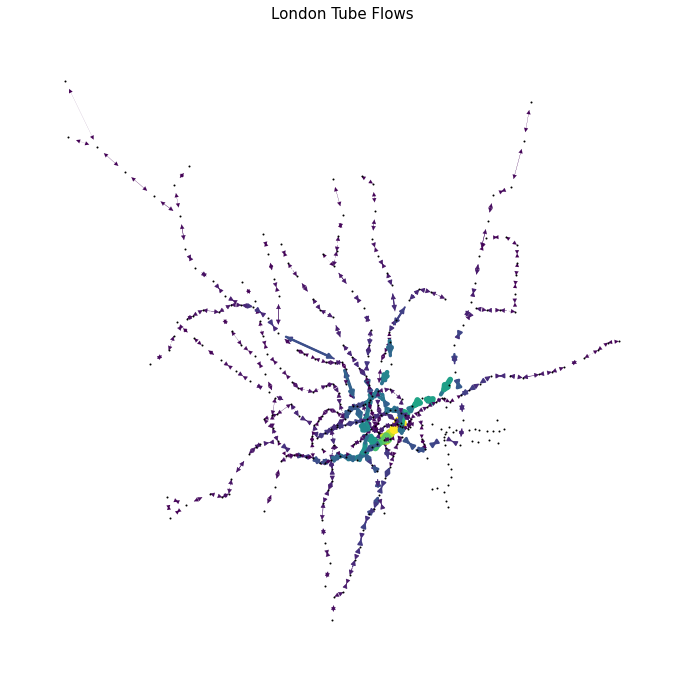

In [90]:
# Lets set colour and size of nodes according to the flows_
weights = [w for e1,e2,w in g_flows.edges(data='weight')]

weights_color=[(w/max(weights)) for e1,e2,w in g_flows.edges(data='weight')]
weights_size=[(w/max(weights)*10) for e1,e2,w in g_flows.edges(data='weight')]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

pos = {e1: xy for e1,xy in g_flows.nodes(data='station_coord')}

edg=nx.draw_networkx_edges(g_flows, pos,edge_color=weights_color, width=weights_size)

nx.draw_networkx_nodes(g_flows,
        pos = pos,
        node_color= 'black',
        node_size= 1)

plt.axis("off")
plt.title("London Tube Flows",fontsize=15)
plt.show()

#this are the directed flows in the tube network!

In [91]:
#We can search for nodes in the flow network
#node
node = [(x,y) for x,y in g_flows.nodes(data='station') if y=='Kilburn']
node

[(168, 'Kilburn')]

In [92]:
#or if you do not know how exacly it is written:
node2 = [(x,y) for x,y in g_flows.nodes(data='station') if 'Kil' in str(y)]
print(node2)
g_flows.nodes[19],g_flows.nodes[168] #the IDs may change for Python3/Python2 depending on the order of appearance

[(19, 'Kilburn Park'), (168, 'Kilburn')]


({'station_coord': (-0.1939, 51.5351), 'station': 'Kilburn Park'},
 {'station_coord': (-0.2047, 51.5471), 'station': 'Kilburn'})

In [93]:
#We can also search edges, however, edges are called by the IDs, no by the names:
print(list(g_flows.edges(data=True))[0:10])


[(0, 1, {'weight': 15400.0}), (0, 2, {'weight': 36470.0}), (0, 33, {'weight': 122309.0}), (0, 75, {'weight': 100026.0}), (0, 76, {'weight': 71061.0}), (0, 152, {'weight': 12433.0}), (0, 165, {'weight': 77391.0}), (1, 0, {'weight': 15035.0}), (1, 6, {'weight': 5231.0}), (2, 0, {'weight': 19675.0})]


In [94]:
#as edges are saved using the IDs, let us create an edges attribute with the station names:
edges_names={(e1,e2):(g_flows.nodes[e1]['station'],g_flows.nodes[e2]['station']) for e1,e2 in g_flows.edges()}

nx.set_edge_attributes(g_flows,edges_names,'station_names') 
print(list(g_flows.edges(data=True))[0:10])

[(0, 1, {'weight': 15400.0, 'station_names': ('Baker Street', 'Marylebone')}), (0, 2, {'weight': 36470.0, 'station_names': ('Baker Street', "Regent's Park")}), (0, 33, {'weight': 122309.0, 'station_names': ('Baker Street', 'Bond Street')}), (0, 75, {'weight': 100026.0, 'station_names': ('Baker Street', 'Edgware Road (C)')}), (0, 76, {'weight': 71061.0, 'station_names': ('Baker Street', 'Great Portland Street')}), (0, 152, {'weight': 12433.0, 'station_names': ('Baker Street', "St. John's Wood")}), (0, 165, {'weight': 77391.0, 'station_names': ('Baker Street', 'Finchley Road')}), (1, 0, {'weight': 15035.0, 'station_names': ('Marylebone', 'Baker Street')}), (1, 6, {'weight': 5231.0, 'station_names': ('Marylebone', 'Edgware Road (B)')}), (2, 0, {'weight': 19675.0, 'station_names': ("Regent's Park", 'Baker Street')})]


In [95]:
#now, we can search edges by names, as for example all edges comming to and leaving from Kilburn Park:
edge = [(e1,e2) for e1,e2,y in g_flows.edges(data='station_names') if 'Alperton' in str(y)]
print(edge)


[(238, 239), (238, 240), (239, 238), (240, 238)]


In [96]:
g_flows.edges[(238, 239)] #Again, the IDs may change for Python3/Python2 depending on the order of appearance

{'weight': 10288.0, 'station_names': ('Alperton', 'Park Royal')}

## Centrality measures

Let's explore the commuting flows network with some exercises on different type of centrality measures and disruptions on the network. Keep in mind that this network is a directed network and nodes and edges centrality depends on the direction of the flows.

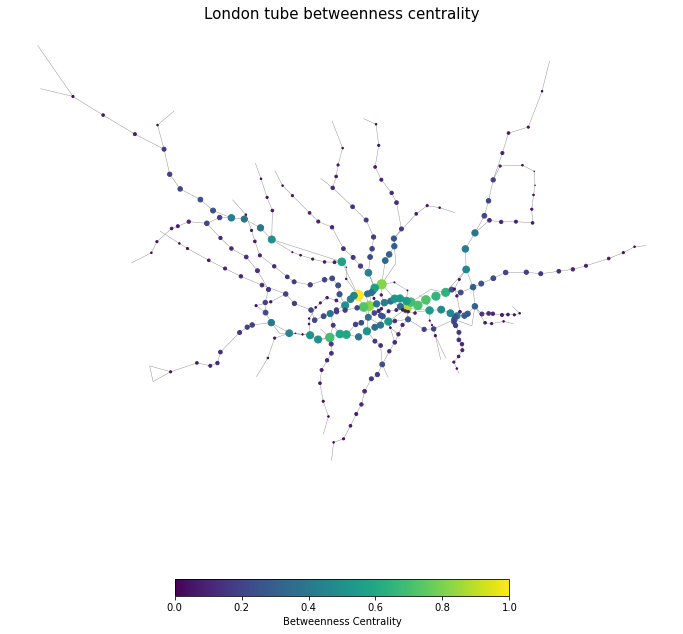

In [97]:
#Let's compare node centrality for the undirected tube network and the directed commuting flows network:
#Let us compute the betweenness centrality for the undirected tube network, considering the distance between stations:
bet_london_w=nx.betweenness_centrality(g_shp_un, weight='distance', normalized=False)
# We can add these values as node attributes:
nx.set_node_attributes(g_shp_un,bet_london_w,'betweenness_un')

# Lets set colour and size of nodes according to betweenness values
betweenness_w_values=[(i[1]['betweenness_un']) for i in g_shp_un.nodes(data=True)]

bet_w_color=[(i[1]['betweenness_un']/max(betweenness_w_values)) for i in g_shp_un.nodes(data=True)]
bet_w_size=[(i[1]['betweenness_un']/max(betweenness_w_values)*100) for i in g_shp_un.nodes(data=True)]


# Plot graph
#pos_shp = {xy: xy for xy in g_shp.nodes()}
pos={e1: xy for e1,xy in g_shp_un.nodes(data='station_coord')}

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(g_shp_un, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(g_shp_un,
        pos = pos,
        node_color= bet_w_color,
        node_size= bet_w_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube betweenness centrality",fontsize=15)
plt.show()

In [98]:
#get a list of nodes with higeher betweeness centrality:
dict_bet_un=dict(g_shp_un.nodes(data=True))

#Python2:
#import operator
#listbet_un=sorted(dict_bet_un.items(), key=operator.itemgetter(1),reverse=True)
#listbet_un[:10]

#Pyhton3:
from collections import OrderedDict
listbet_un=OrderedDict(sorted(dict_bet_un.items(), key=lambda x: x[1]['betweenness_un'],reverse=True))
list(listbet_un.items())[:10]

[(0,
  {'station': 'Baker Street',
   'station_coord': (-0.1571, 51.5226),
   'betweenness_un': 13194.0}),
 (25,
  {'station': 'Bank',
   'station_coord': (-0.0886, 51.5133),
   'betweenness_un': 11605.0}),
 (24,
  {'station': 'Oxford Circus',
   'station_coord': (-0.1415, 51.515),
   'betweenness_un': 10847.0}),
 (88,
  {'station': "King's Cross St. Pancras",
   'station_coord': (-0.1238, 51.5308),
   'betweenness_un': 10794.0}),
 (33,
  {'station': 'Bond Street',
   'station_coord': (-0.1494, 51.5142),
   'betweenness_un': 9597.0}),
 (96,
  {'station': 'Whitechapel',
   'station_coord': (-0.0612, 51.5194),
   'betweenness_un': 9500.0}),
 (95,
  {'station': 'Aldgate East',
   'station_coord': (-0.0726, 51.5154),
   'betweenness_un': 9334.0}),
 (116,
  {'station': "Earl's Court",
   'station_coord': (-0.1973, 51.492),
   'betweenness_un': 9201.0}),
 (26,
  {'station': 'Liverpool Street',
   'station_coord': (-0.0823, 51.5178),
   'betweenness_un': 9195.0}),
 (131,
  {'station': 'Stepne

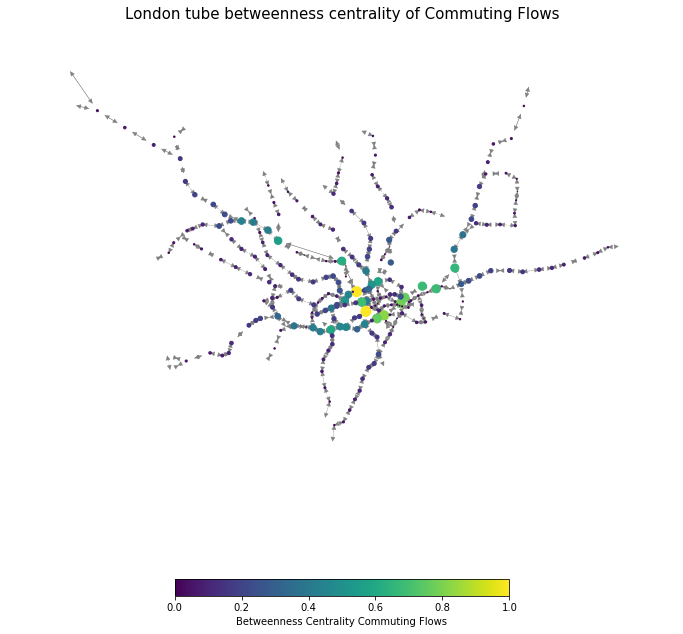

In [99]:
#now let us compute betweenness centrality for directed commuting flows:
bet_london_w=nx.betweenness_centrality(g_flows, weight='weights', normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(g_flows,bet_london_w,'betweenness_flows')

betweenness_w_values=[(i[1]['betweenness_flows']) for i in g_flows.nodes(data=True)]

bet_w_color=[(i[1]['betweenness_flows']/max(betweenness_w_values)) for i in g_flows.nodes(data=True)]
bet_w_size=[(i[1]['betweenness_flows']/max(betweenness_w_values)*100) for i in g_flows.nodes(data=True)]

# Plot graph
pos={e1: xy for e1,xy in g_flows.nodes(data='station_coord')}

fig, ax = plt.subplots(figsize=(12,12))

pos = {e1: xy for e1,xy in g_flows.nodes(data='station_coord')}

edg=nx.draw_networkx_edges(g_flows, pos,edge_color='gray', width=0.4)

nx.draw_networkx_nodes(g_flows,
        pos = pos,
        node_color= bet_w_color,
        node_size= bet_w_size)

plt.axis("off")
plt.colorbar(nod,label="Betweenness Centrality Commuting Flows",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube betweenness centrality of Commuting Flows",fontsize=15)
plt.show()

In [100]:
#list of top betweenness nodes for commuting flows:
dict_bet_flows=dict(g_flows.nodes(data=True))

#Python2
#import operator
#listbet_flows=sorted(dict_bet_flows.items(), key=operator.itemgetter(1),reverse=True)
#listbet_flows[:10]

#Pyhton3:
from collections import OrderedDict
listbet_flows=OrderedDict(sorted(dict_bet_flows.items(), key=lambda x: x[1]['betweenness_flows'],reverse=True))
list(listbet_flows.items())[:10]

[(0,
  {'station_coord': (-0.1571, 51.5226),
   'station': 'Baker Street',
   'betweenness_flows': 24275.2873015873}),
 (155,
  {'station_coord': (-0.1428, 51.5067),
   'station': 'Green Park',
   'betweenness_flows': 24223.79761904762}),
 (10,
  {'station_coord': (-0.1143, 51.5036),
   'station': 'Waterloo',
   'betweenness_flows': 20063.25238095239}),
 (25,
  {'station_coord': (-0.0886, 51.5133),
   'station': 'Bank',
   'betweenness_flows': 19119.540476190436}),
 (26,
  {'station_coord': (-0.0823, 51.5178),
   'station': 'Liverpool Street',
   'betweenness_flows': 18618.042857142853}),
 (86,
  {'station_coord': (-0.1254, 51.501),
   'station': 'Westminster',
   'betweenness_flows': 18471.202380952374}),
 (33,
  {'station_coord': (-0.1494, 51.5142),
   'station': 'Bond Street',
   'betweenness_flows': 16957.868253968263}),
 (32,
  {'station_coord': (-0.0332, 51.5249),
   'station': 'Mile End',
   'betweenness_flows': 16545.271428571486}),
 (31,
  {'station_coord': (-0.0549, 51.527),


### Closeness centrality

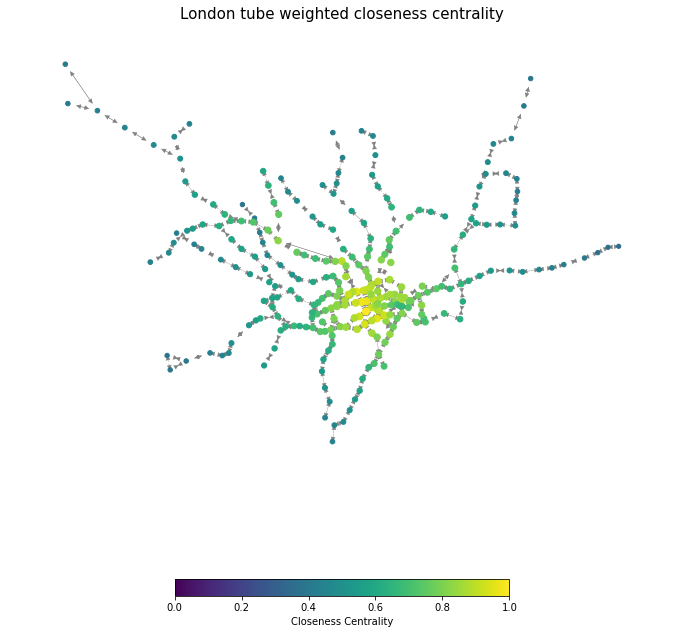

In [101]:
#Weighted closeness centrality: 
clos_w=nx.closeness_centrality(g_flows, distance='distance')
# We can add these values to the nodes attributes:
nx.set_node_attributes(g_flows,clos_w,'closeness_w')

pd.DataFrame.from_dict(clos_w,columns=['closeness_w'],orient='index')[0:10]
# Lets set color and width of nodes according to the closeness values

clos_w_val=[(i[1]['closeness_w']) for i in g_flows.nodes(data=True)]

closs_w_color=[(i[1]['closeness_w']-min(clos_w_val))/(max(clos_w_val)-min(clos_w_val)) for i in g_flows.nodes(data=True)]
closs_w_size=[((i[1]['closeness_w']-min(clos_w_val))/(max(clos_w_val)-min(clos_w_val))*50) for i in g_flows.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(g_flows, pos,edge_color='gray', 
        width=0.4)

nod=nx.draw_networkx_nodes(g_flows,
        pos = pos,
        node_color= closs_w_color,
        node_size= closs_w_size)

plt.colorbar(nod,label="Closeness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube weighted closeness centrality",fontsize=15)
plt.show()

### Degree centrality

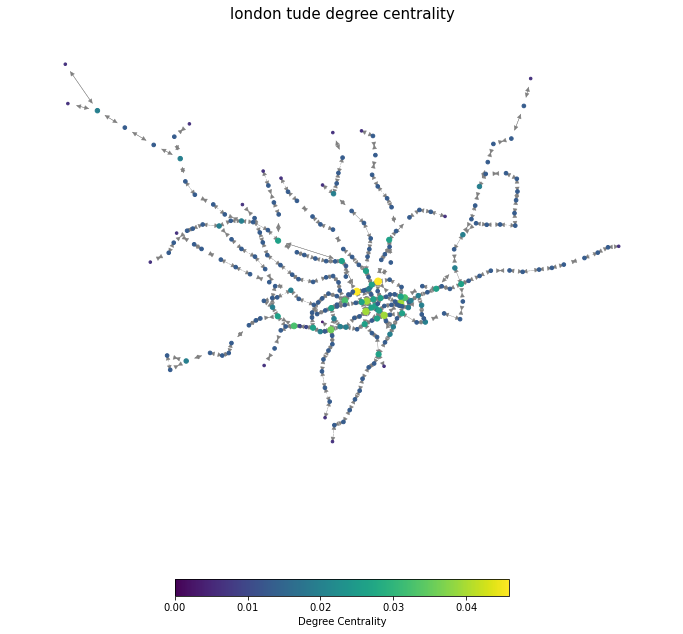

In [102]:
test =nx.degree_centrality(g_flows)


nx.set_node_attributes(g_flows,dict(test),'degree_norm')

deg_color_norm=[(node['degree_norm']) for i, node in g_flows.nodes(data=True)]
deg_size_norm=[(node['degree_norm']*1000) for i, node in g_flows.nodes(data=True)]


fig, ax = plt.subplots(figsize=(12,12))
pos=pos

nx.draw_networkx_edges(g_flows, pos,edge_color='gray', 
        width=0.4)

nod=nx.draw_networkx_nodes(g_flows,
        pos = pos,
        node_color= deg_color_norm,
        node_size= deg_size_norm)

plt.colorbar(nod,label="Degree Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("london tude degree centrality",fontsize=15)
plt.show()


#Note that values now go from 0 to 1

### sequential

In [103]:
import copy
g_flows_bs=copy.deepcopy(g_flows)
g_flows_cs=copy.deepcopy(g_flows)
g_flows_ds=copy.deepcopy(g_flows)

### betweeness centrality

In [104]:
for i in range(10):
    a = nx.get_node_attributes(g_flows_bs, 'betweenness_flows')
    for n in g_flows_bs: 
        #print('an: ' + str(a[(n)]))
        #print('max_bet: ' + str(max(bet_london_w.values())))
        if a[(n)] == max(bet_london_w.values()):
            g_flows_bs.remove_node(n)
            bet_london_w=nx.betweenness_centrality(g_flows_bs, weight='weights', normalized=False)
            print(n)
            nx.set_node_attributes(g_flows_bs, bet_london_w, 'betweenness_flows')
            break

# We can add these values to the nodes attributes:

0
116
60
26
25
155
4
115
109
96


In [105]:
 max(bet_london_w.values())

2430.0

In [106]:
l1=list(g_flows_bs.nodes)
len(l1)

296

In [107]:
l1=g_flows.nodes
l2=g_flows_bs.nodes
list(set(l1) - set(l2))

[0, 96, 4, 109, 115, 116, 25, 26, 155, 60]

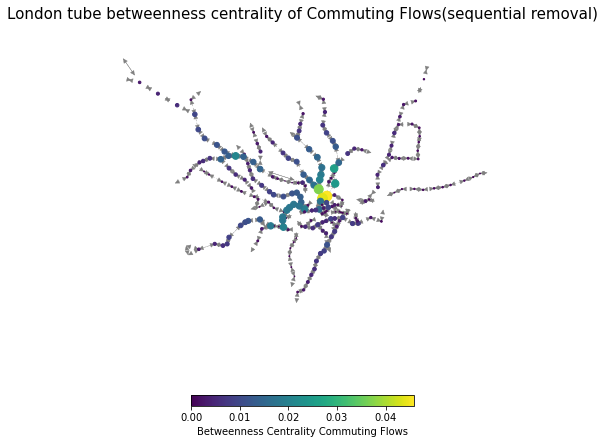

In [111]:
#now let us compute betweenness centrality for directed commuting flows:
bet_london_w=nx.betweenness_centrality(g_flows_bs, weight='weights', normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(g_flows_bs,bet_london_w,'betweenness_flows')

betweenness_w_values=[(i[1]['betweenness_flows']) for i in g_flows_bs.nodes(data=True)]

bet_w_color=[(i[1]['betweenness_flows']/max(betweenness_w_values)) for i in g_flows_bs.nodes(data=True)]
bet_w_size=[(i[1]['betweenness_flows']/max(betweenness_w_values)*100) for i in g_flows_bs.nodes(data=True)]

# Plot graph
pos={e1: xy for e1,xy in g_flows_bs.nodes(data='station_coord')}

fig, ax = plt.subplots(figsize=(8,8))

pos = {e1: xy for e1,xy in g_flows_bs.nodes(data='station_coord')}

edg=nx.draw_networkx_edges(g_flows_bs, pos,edge_color='gray', width=0.4)

nx.draw_networkx_nodes(g_flows_bs,
        pos = pos,
        node_color= bet_w_color,
        node_size= bet_w_size)

plt.axis("off")
plt.colorbar(nod,label="Betweenness Centrality Commuting Flows",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube betweenness centrality of Commuting Flows(sequential removal)",fontsize=15)
plt.show()

### closeness centrality

In [109]:
for i in range(10):
    a = nx.get_node_attributes(g_flows_cs, 'closeness_w')
    for n in g_flows_cs: 
        #print('an: ' + str(a[(n)]))
        #print('max_bet: ' + str(max(bet_london_w.values())))
        if a[(n)] == max(clos_w.values()):
            g_flows_cs.remove_node(n)
            clos_w=nx.closeness_centrality(g_flows_cs, distance='distance')
            print(n)
            nx.set_node_attributes(g_flows_cs, clos_w, 'closeness_w')
            break


155
24
88
91
25
7
10
60
115
96


KeyError: 0

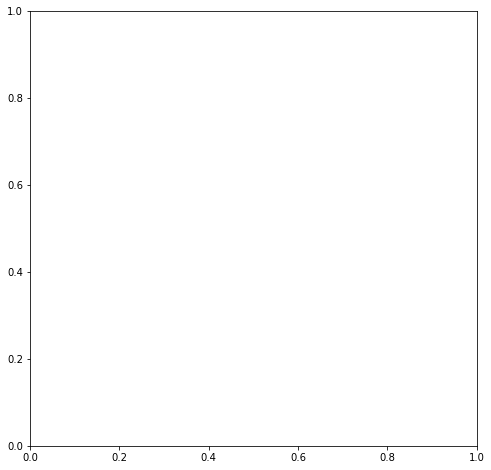

In [112]:
#Weighted closeness centrality: 
clos_w=nx.closeness_centrality(g_flows_cs, distance='distance')
# We can add these values to the nodes attributes:
nx.set_node_attributes(g_flows_cs,clos_w,'closeness_w')

pd.DataFrame.from_dict(clos_w,columns=['closeness_w'],orient='index')[0:10]
# Lets set color and width of nodes according to the closeness values

clos_w_val=[(i[1]['closeness_w']) for i in g_flows_cs.nodes(data=True)]

closs_w_color=[(i[1]['closeness_w']-min(clos_w_val))/(max(clos_w_val)-min(clos_w_val)) for i in g_flows_cs.nodes(data=True)]
closs_w_size=[((i[1]['closeness_w']-min(clos_w_val))/(max(clos_w_val)-min(clos_w_val))*50) for i in g_flows_cs.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(8,8))
pos = {e1: xy for e1,xy in g_flows_bs.nodes(data='station_coord')}
nx.draw_networkx_edges(g_flows_cs, pos, edge_color='gray', width=0.4)
nod=nx.draw_networkx_nodes(g_flows_cs,
        pos = pos,
        node_color= closs_w_color,
        node_size= closs_w_size)

plt.colorbar(nod,label="Closeness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube weighted closeness centrality(sequential removal)",fontsize=15)
plt.show()

### degree centrality

In [113]:
for i in range(10):
    a = nx.get_node_attributes(g_flows_ds, 'degree_norm')
    for n in g_flows_ds: 
        if a[(n)] == max(test.values()):
            g_flows_ds.remove_node(n)
            print(n)
            test =nx.degree_centrality(g_flows_ds)
            nx.set_node_attributes(g_flows_ds,test,'degree_norm')
            break

0
88
10
24
116
7
25
112
155
26


KeyError: 4

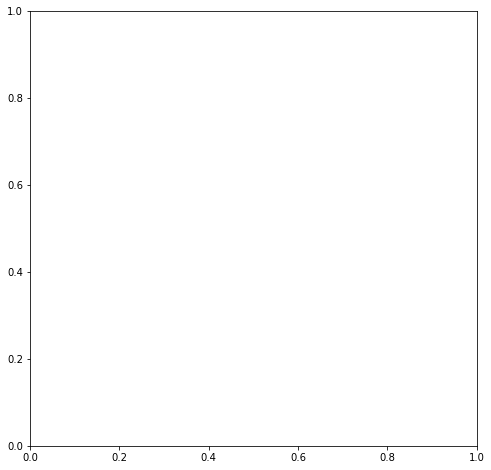

In [114]:
test =nx.degree_centrality(g_flows_ds)


nx.set_node_attributes(g_flows_ds,dict(test),'degree_norm')

deg_color_norm=[(node['degree_norm']) for i, node in g_flows_ds.nodes(data=True)]
deg_size_norm=[(node['degree_norm']*1000) for i, node in g_flows_ds.nodes(data=True)]


fig, ax = plt.subplots(figsize=(8,8))
pos=pos

nx.draw_networkx_edges(g_flows_ds, pos,edge_color='gray', 
        width=0.4)

nod=nx.draw_networkx_nodes(g_flows_ds,
        pos = pos,
        node_color= deg_color_norm,
        node_size= deg_size_norm)

plt.colorbar(nod,label="Degree Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube weighted degree centrality(sequential removal)",fontsize=15)
plt.show()


#Note that values now go from 0 to 1

## impact

In [127]:
nx.global_efficiency(ds)
nx.global_efficiency(cs)
nx.global_efficiency(bs)

0.025395158687565433

In [126]:
ds=nx.Graph(g_flows_ds)
cs=nx.Graph(g_flows_cs)
bs=nx.Graph(g_flows_bs)

In [ ]:
nx.number_strongly_connected_components(g_flows)

We can do this comparison also for edges centrality, closeness and other metrics. Applied to nodes betweenness centrality, we observe changes in the top 10 considering station distances and considering the commuting flows. This fact points out the importance of considering the actual commuters flows to capture the importance of stations in the transportation network.

Identify whether the order of top stations is different or the same considering the commuting flows. Now think about how to measure the impact of the removal on the network.